
# Project: Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href='#cleaning'>Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This analysis is to explore a dataset containing 110k medial appointments from Brazil and is focused on the question of whether or not patients show up for their appointment.  Characteristics of the patient are included in each row.

### Data Dictionary:
- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female
- ScheduledDay: The day of the actual appointment, when they have to visit the doctor
- AppointmentDay: The day someone called or registered the appointment
- Age: How old is the patient
- Neighbourhood: Where the appointment takes place
- Scholarship: True or False, indicates if the patient is in the Bolsa Familia program
- Hipertension: True or False
- Diabetes: True or False
- Alcoholism: True or False
- Handcap: True or False
- SMS_received: True or False
- No-show: "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up

The aim of the dataset to find possible reasons for patient no-showing at the scheduled appointments.

In [1]:
# import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import datetime

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling
This phase the data will be analysed, check missing or weird values.

### Data Gathering:

In [2]:
# Load the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

> ### Observations:
> - The ID of Patients and Appointments very specific and won't analyze it.
> - ScheduledDays and AppointmentDays format is a part of ISO-8601 date representation.
> - Columns Hypertension, Handicap have typos.
> - The patient column No-show when assigned yes mean they are not attending the appointment.

In [3]:
# Check shape of the dataset
df.shape

(110527, 14)

> ^The total number of the appointments **110K**

In [4]:
# check data type and missing data  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> ### Observations:
> - No missing data.
> - ScheduledDays and AppointmentDays type is object need to convert to datatime type for further analysis.
> - No-show type has to be integer or boolean.

In [5]:
# this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> ^Handicap should have only 2 values.

In [6]:
# Describe stastics of the dataset
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

> ### Observations:
> - The patient ages between 20 - 55.
> - There is one patient has the age -1, which is incorrect.
> - There are 25% of patients have the age 0, which may lead to a newborn.

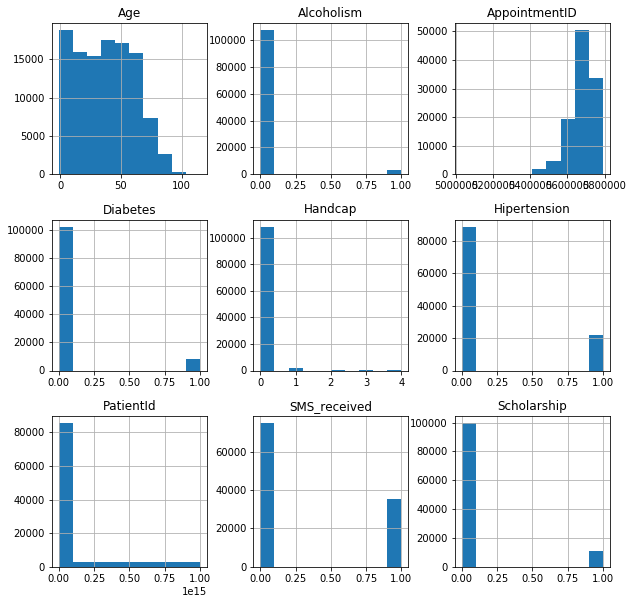

In [7]:
# histogram distribution of different variables
df.hist(figsize=(10,10));

> ### Observations
> - Ages histogram has a positive skew
> - Most of the patient has no scholarship, hypertension, diabetes, alcoholism, handicap
> - Number of the patient not received SMS twice received patient

In [8]:
# Check duplicate in dataframe
sum(df.duplicated())

0

> ^No duplicated data

## Questions

- Does the female more concerned to attend appointments than a male?
- Does the older patient more concerned to attend appointments than the younger patient?
- Does the appointment weekday influence attending the appointment?
- Do those received SMS miss the appointment?


<a id='cleaning'></a>
# Data Cleaning:

This phase will focus on:
- Remove unused columns.
- Rename typos columns.
- Remove the weird age values.
- Format date-related columns to the datetime type.
- Format the scholarship, hypertension, diabetes, alcoholism to boolean type
- Format the handicap field correctly
- Add new columns
    - Appointment_week_day: to show what day of the week the appointment was scheduled.

_Documented this process helps keep track of the modification. The style of the clean is to address the issue and taken action for such an issue. After each code, the outcome is noted._

In [9]:
# Make a copy of dataset
df_cleaned = df.copy()

df_cleaned.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

_**Getting rid of ID of patient and appointment** because they are very specific and won't help in analysis_

In [10]:
# used drop function, axis=1 mean column , inplace=True to keep those changes
df_cleaned.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

print(df_cleaned.columns)

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')


_**Getting rid of typos**_

In [11]:
# Rename columns
df_cleaned.rename(columns={'Hipertension':'Hypertension',
                    'Handcap':'Handicap'}, inplace=True)

print(df_cleaned.columns)

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show'],
      dtype='object')


**Check patient who has age -1, which is incorrect**

In [12]:
# To see patients have negitive age
df_cleaned[df_cleaned['Age']<0]

Gender          ScheduledDay        AppointmentDay  Age Neighbourhood  \
99832      F  2016-06-06T08:58:13Z  2016-06-06T00:00:00Z   -1         ROMÃO   

       Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
99832            0             0         0           0         0   

       SMS_received No-show  
99832             0      No

> ^Since the dataset is large let's remove the incorrect row

In [13]:
# Used drop function
df_cleaned.drop(df_cleaned[df_cleaned['Age']<0].index, inplace = True)

df_cleaned[df_cleaned['Age']<0]

Empty DataFrame
Columns: [Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, No-show]
Index: []

> ^ Issue had been solved

**Next, Checking patients who have age 0**

In [14]:
# To see patients have age = 0
df_cleaned[df_cleaned['Age'] == 0]

Gender          ScheduledDay        AppointmentDay  Age  \
59          F  2016-04-29T08:08:43Z  2016-04-29T00:00:00Z    0   
63          M  2016-04-27T10:46:12Z  2016-04-29T00:00:00Z    0   
64          M  2016-04-25T13:28:21Z  2016-04-29T00:00:00Z    0   
65          M  2016-04-27T10:48:50Z  2016-04-29T00:00:00Z    0   
67          F  2016-04-29T08:53:02Z  2016-04-29T00:00:00Z    0   
...       ...                   ...                   ...  ...   
110345      F  2016-05-16T12:30:58Z  2016-06-01T00:00:00Z    0   
110346      M  2016-06-06T14:22:34Z  2016-06-08T00:00:00Z    0   
110454      F  2016-06-03T15:18:44Z  2016-06-03T00:00:00Z    0   
110460      F  2016-06-03T08:56:51Z  2016-06-03T00:00:00Z    0   
110507      F  2016-06-08T09:04:18Z  2016-06-08T00:00:00Z    0   

            Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
59              CONQUISTA            0             0         0           0   
63           SÃO BENEDITO            0             0         0           0   
64      ILHA DAS CAIEIRAS            0             0         0           0   
65              CONQUISTA            0             0         0           0   
67         NOVA PALESTINA            0             0         0           0   
...                   ...          ...           ...       ...         ...   
110345        RESISTÊNCIA            0             0         0           0   
110346        RESISTÊNCIA            0             0         0           0   
110454        RESISTÊNCIA            0             0         0           0   
110460        RESISTÊNCIA            0             0         0           0   
110507        MARIA ORTIZ            0             0         0           0   

        Handicap  SMS_received No-show  
59             0             0      No  
63             0             0      No  
64             0             1      No  
65             0             0      No  
67             0             0      No  
...          ...           ...     ...  
110345         0             0      No  
110346         0             0      No  
110454         0             0      No  
110460         0             0      No  
110507         0             0      No  

[3539 rows x 12 columns]

> ^There are 3539 patients has age 0 year, they may consider as new born but let's check if there are something common in these patients.

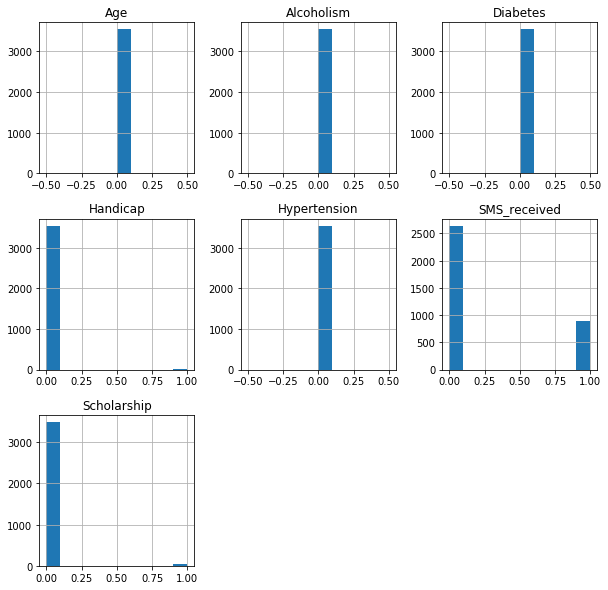

In [15]:
df_cleaned[df_cleaned['Age'] == 0].hist(figsize=(10,10));
# hist for patiants incorrect age has Scholarship, Hypertension, Diabetes, Alcoholism, Hanidcap

> ^Its impossible for new born patient to have alcohlism. Since the dataset is large let's remove the impossible rows.

In [16]:
# Used drop function
df_cleaned.drop(df_cleaned[df_cleaned['Age'] == 0].index, inplace = True)

df_cleaned[df_cleaned['Age'] == 0]

Empty DataFrame
Columns: [Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, No-show]
Index: []

> ^ Issue has been solved

**Check data types**

In [17]:
df_cleaned.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
No-show           object
dtype: object

> ^ScheduledDay and AppointmentDay type are need covert to date time.

In [18]:
# Convert to datetime
df_cleaned['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) 
df_cleaned['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']) 

df_cleaned.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
dtype: object

> ^ScheduledDay and AppointmentDay are now in datatime type.

In [19]:
print('Scholarship:',df_cleaned.Scholarship.unique())
print('Hypertension:',df_cleaned.Hypertension.unique())
print('Diabetes:',df_cleaned.Diabetes.unique())
print('Alcoholism:',df_cleaned.Alcoholism.unique())
print('Handicap',df_cleaned.Handicap.unique())
print('SMS_received',df_cleaned.SMS_received.unique())

Scholarship: [0 1]
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handicap [0 1 2 3 4]
SMS_received [0 1]


**Columns: Scholarship, Hypertension, Diabetes, Alcoholism and SMS_received need convert it to boolean type, Hanicap has levels but in this analysis want categories patient to have handicap or not.**

In [20]:
# Convert to boolean
df_cleaned['Scholarship'] = df_cleaned['Scholarship'].astype('bool')
df_cleaned['Hypertension'] = df_cleaned['Hypertension'].astype('bool')
df_cleaned['Diabetes'] = df_cleaned['Diabetes'].astype('bool')
df_cleaned['Alcoholism'] = df_cleaned['Alcoholism'].astype('bool')
df_cleaned['SMS_received'] = df_cleaned['SMS_received'].astype('bool')

# Get rid of levels and convert to boolean
df_cleaned['Handicap'] = df_cleaned['Handicap'].apply(lambda x: True if x>=1 else False)

In [21]:
# Check if it's work
print('Scholarship:',df_cleaned.Scholarship.unique())
print('Hypertension:',df_cleaned.Hypertension.unique())
print('Diabetes:',df_cleaned.Diabetes.unique())
print('Alcoholism:',df_cleaned.Alcoholism.unique())
print('SMS_received',df_cleaned.SMS_received.unique())
print('Handicap',df_cleaned.Handicap.unique())


Scholarship: [False  True]
Hypertension: [ True False]
Diabetes: [False  True]
Alcoholism: [False  True]
SMS_received [False  True]
Handicap [False  True]


> ^Issue had been solved

**Replace confuse part, in column No-show when assined yes it's mean they are not attend the appointment**

In [22]:
# Rename columns
df_cleaned.rename(columns={'No-show':'Attend'}, inplace=True)

# df_cleaned['Attend'] = df_cleaned['Attend'].apply(lambda x: True if x == 'No' else False)
# Switch no to yes after rename
df_cleaned['Attend'].replace(['Yes','No'],['False','True'],inplace=True)

df_cleaned.head()

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA        False          True     False       False   
1    JARDIM DA PENHA        False         False     False       False   
2      MATA DA PRAIA        False         False     False       False   
3  PONTAL DE CAMBURI        False         False     False       False   
4    JARDIM DA PENHA        False          True      True       False   

   Handicap  SMS_received Attend  
0     False         False   True  
1     False         False   True  
2     False         False   True  
3     False         False   True  
4     False         False   True

In [23]:
df_cleaned.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                      bool
Hypertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handicap                         bool
SMS_received                     bool
Attend                         object
dtype: object

> ^ Issue had been solved

**Creat column "appointment_week_day"**

In [24]:
# Create days of the week
Weekdays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

# Creating "Appointment_week_day" which to show what day of the week the appointment was scheduled
df_cleaned['Appointment_week_day'] = df_cleaned['AppointmentDay'].apply(lambda x: Weekdays[x.weekday()])

df_cleaned.head()

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA        False          True     False       False   
1    JARDIM DA PENHA        False         False     False       False   
2      MATA DA PRAIA        False         False     False       False   
3  PONTAL DE CAMBURI        False         False     False       False   
4    JARDIM DA PENHA        False          True      True       False   

   Handicap  SMS_received Attend Appointment_week_day  
0     False         False   True               Friday  
1     False         False   True               Friday  
2     False         False   True               Friday  
3     False         False   True               Friday  
4     False         False   True               Friday

**Reorder columns**

In [25]:
# Change the order of columns so Appointment_week_day next to AppointmentDay
columns_new_order = ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
                     'Diabetes', 'Alcoholism', 'Handicap', 'ScheduledDay', 'AppointmentDay',
                     'Appointment_week_day','SMS_received', 'Attend']

df_cleaned = df_cleaned[columns_new_order]

df_cleaned.head()

Gender  Age      Neighbourhood  Scholarship  Hypertension  Diabetes  \
0      F   62    JARDIM DA PENHA        False          True     False   
1      M   56    JARDIM DA PENHA        False         False     False   
2      F   62      MATA DA PRAIA        False         False     False   
3      F    8  PONTAL DE CAMBURI        False         False     False   
4      F   56    JARDIM DA PENHA        False          True      True   

   Alcoholism  Handicap              ScheduledDay            AppointmentDay  \
0       False     False 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   
1       False     False 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   
2       False     False 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   
3       False     False 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00   
4       False     False 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   

  Appointment_week_day  SMS_received Attend  
0               Friday         False   True  
1               Friday         False   True  
2               Friday         False   True  
3               Friday         False   True  
4               Friday         False   True

_**After cleaning phase we have a good quality table, let's save it.**_

In [26]:
df_cleaned.to_csv('Appointments_data_cleaned.csv', index=False)

<a id='eda'></a>
# Exploratory Data Analysis

First, let's review all questions that I want to answer:

- Does the female more concern to attend appointment than male?
- Does the older patient more concern to attend appointment than younger patient?
- Does those recived sms miss the appointment?
- Does the appointment week day influence attending the appointment?

### Let's analysis each column of dataset:

- _**Patient gender**_

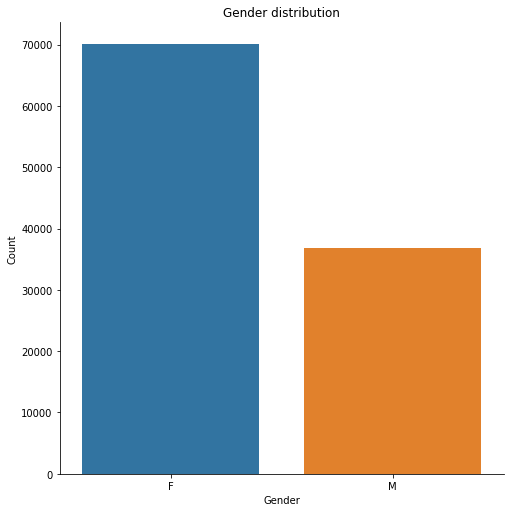

In [27]:
sns.catplot(x='Gender', data = df_cleaned, kind='count', height = 7)
plt.ylabel("Count")
plt.title("Gender distribution")
plt.show()

> ^The number of females more than males, to compare need take the proportion

- _**Patient age**_

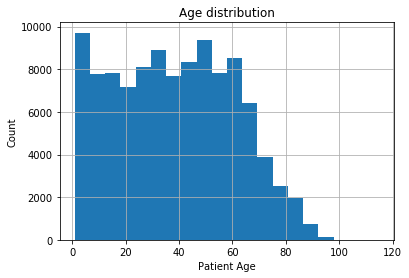

In [28]:
# Plot age distribution
df_cleaned['Age'].hist(bins=20)
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.title("Age distribution")
plt.show()

In [29]:
# About Neighbourhood
print(' Oldest patient is',df_cleaned.Age.max(), 'years old',"\n",
     'Youngest patient is',df_cleaned.Age.min(), 'years old',"\n",
     'Most patient age is',df_cleaned.Age.median(), 'years old')

 Oldest patient is 115 years old 
 Youngest patient is 1 years old 
 Most patient age is 38.0 years old


- _**Patient Neighbourhood**_

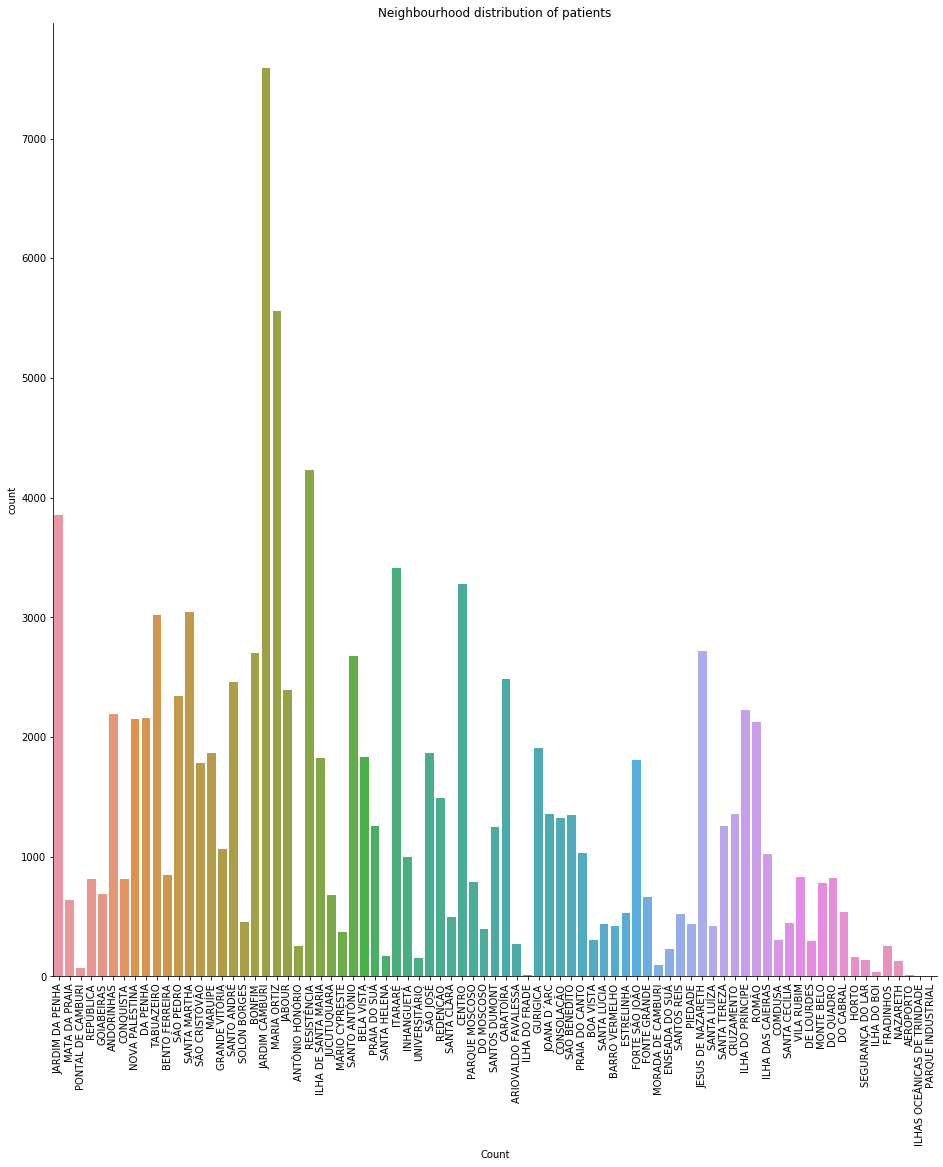

In [30]:
sns.catplot(x='Neighbourhood', data = df_cleaned, kind='count', height=14)
plt.xticks(rotation=90)
plt.xlabel("Count")
plt.title("Neighbourhood distribution of patients")
plt.show()

In [31]:
# About patients neighbourhood
print(' The highest number of patient coming from',df_cleaned.Neighbourhood.max(),"\n",
     'The lowest number of patient coming from',df_cleaned.Neighbourhood.min(),"\n",
     'Patients coming from',len(df_cleaned.Neighbourhood.value_counts()),'different neighbourhood')

 The highest number of patient coming from VILA RUBIM 
 The lowest number of patient coming from AEROPORTO 
 Patients coming from 81 different neighbourhood


- _**Scholarship**_

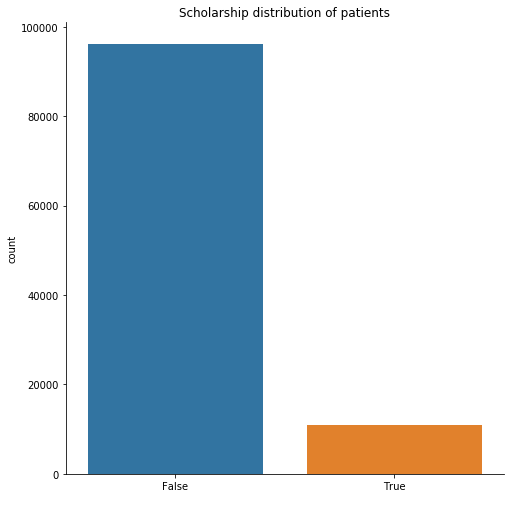

In [32]:
sns.catplot(x='Scholarship', data = df_cleaned, kind='count', height=7)
plt.xlabel(" ")
plt.title("Scholarship distribution of patients")
plt.show()

> Majority of the patient doesn't in the Bolsa Familia program

- _**Hypertension**_

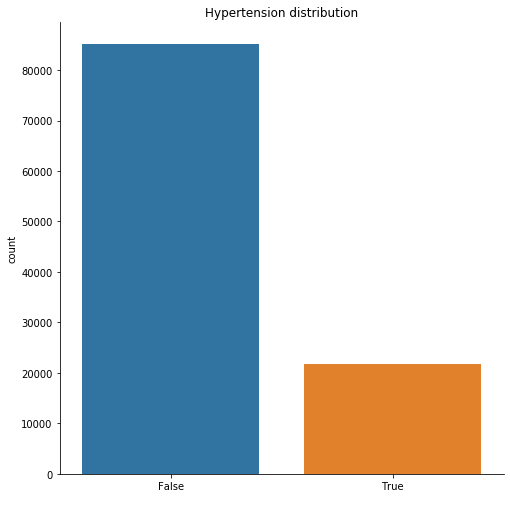

In [33]:
sns.catplot(x='Hypertension', data = df_cleaned, kind='count', height=7)
plt.xlabel(" ")
plt.title("Hypertension distribution")
plt.show()

> Majority of the patient doesn't have hypertension

- _**Diabetes**_

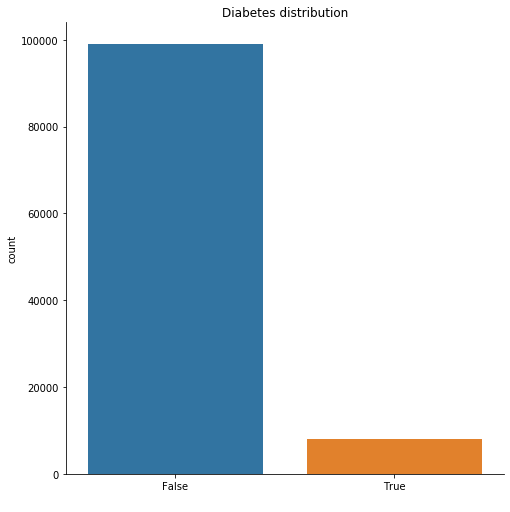

In [34]:
sns.catplot(x='Diabetes', data = df_cleaned, kind='count', height=7)
plt.xlabel(" ")
plt.title("Diabetes distribution")
plt.show()

> Majority of the patient doesn't have diabetes

- _**Alcoholism**_

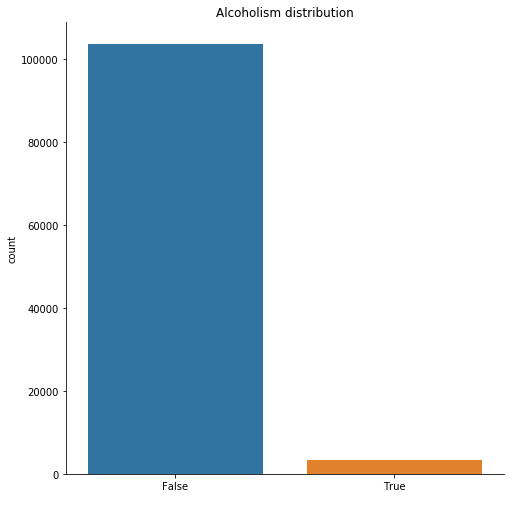

In [35]:
sns.catplot(x='Alcoholism', data = df_cleaned, kind='count', height=7)
plt.xlabel(" ")
plt.title("Alcoholism distribution")
plt.show()

> Majority of the patient doesn't have diabetes

- _**Handicap**_

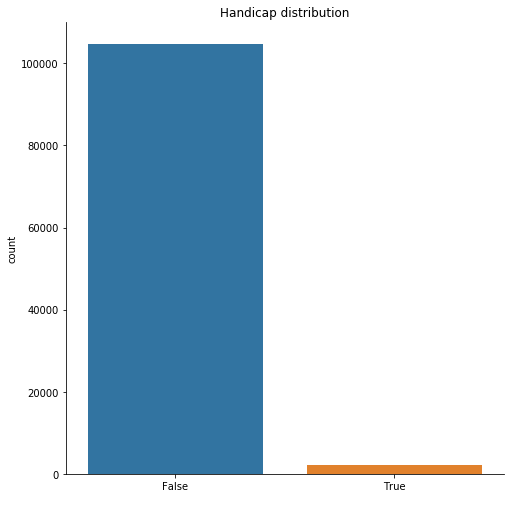

In [36]:
sns.catplot(x='Handicap', data = df_cleaned, kind='count', height=7)
plt.xlabel(" ")
plt.title("Handicap distribution")
plt.show()

> Majority of the patient doesn't have Handicap

- _**Scheduled Day**_

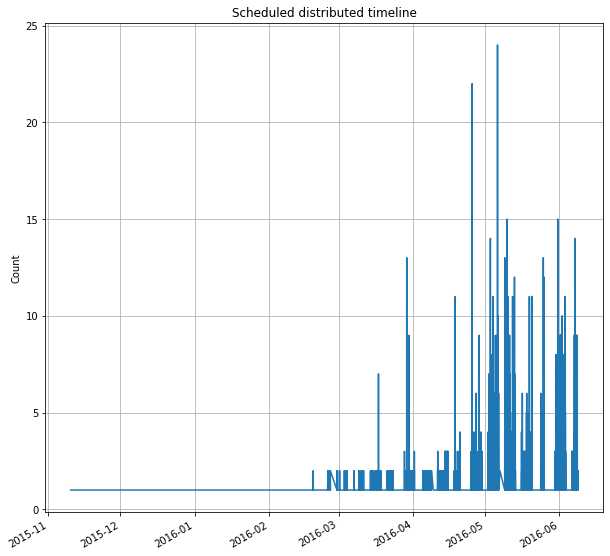

In [37]:
df_cleaned.ScheduledDay.value_counts().plot(figsize=(10,10))
plt.ylabel("Count")
plt.title("Scheduled distributed timeline")
plt.grid()
plt.show()

- _**Appointment Day**_

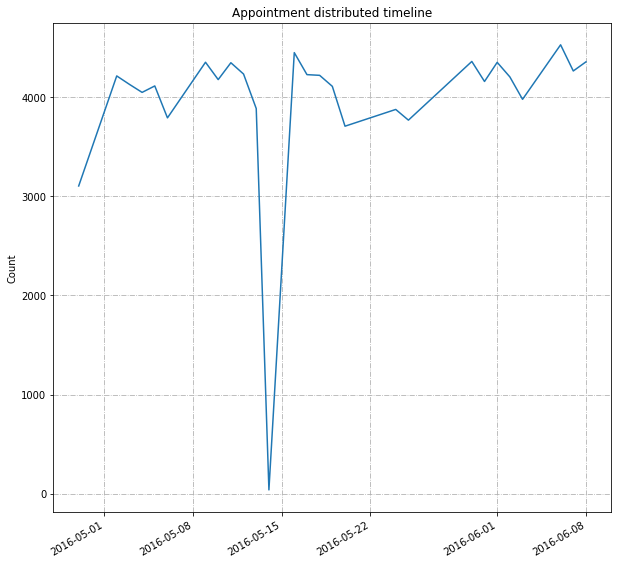

In [38]:
df_cleaned.AppointmentDay.value_counts().plot(figsize=(10,10))
plt.ylabel("Count")
plt.title("Appointment distributed timeline")
plt.grid(linestyle='-.')
plt.show()

In [39]:
# Patients appointments between
df_cleaned.AppointmentDay.min(), df_cleaned.AppointmentDay.max()

(Timestamp('2016-04-29 00:00:00+0000', tz='UTC'),
 Timestamp('2016-06-08 00:00:00+0000', tz='UTC'))

- _**Appointment week day**_

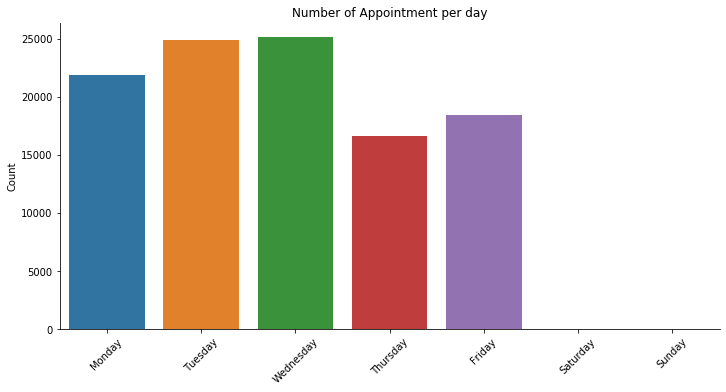

In [40]:
# Visualize  the table
sns.catplot(x='Appointment_week_day', data = df_cleaned, kind='count', order = Weekdays, aspect=2)
plt.xticks(rotation=45)
plt.title("Number of Appointment per day")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

> No appointment in weekend

- _**SMS Received**_

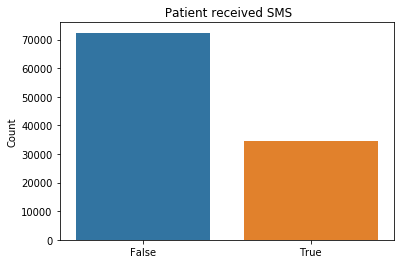

In [41]:
sns.countplot(x="SMS_received", data=df_cleaned);
plt.title(" Patient received SMS")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

In [42]:
# Total number of patients who attend the appointment compare received SMS and those who didn't
attend.SMS_received.value_counts()

NameError: name 'attend' is not defined

- _**Attendees**_

In [43]:
df_cleaned.Attend.value_counts()

True     85307
False    21680
Name: Attend, dtype: int64

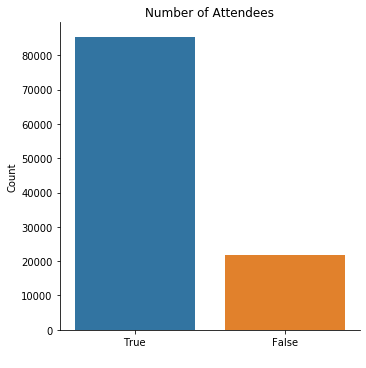

In [44]:
sns.catplot(x='Attend', data = df_cleaned, kind='count')
plt.xlabel(" ")
plt.ylabel("Count")
plt.title("Number of Attendees")
plt.show()

> ^The number of attendees more than the absence

### Combine two variables

_**The relation between absent and gender**_


In [45]:
# Separate attend and absent for further analyze
attend = df_cleaned[df_cleaned['Attend'] == 'True']
absent = df_cleaned[df_cleaned['Attend'] == 'False']

# Seprate gender for further analyze
female = df_cleaned[df_cleaned['Gender'] == 'F']
male = df_cleaned[df_cleaned['Gender'] == 'M']

In [46]:
# Separate gender for further analyze
# absent_f is number of female Patient who was absent
absent_f = absent[absent['Gender'] == 'F']
absent_m = absent[absent['Gender'] == 'M']

# prop_absent_f is proportion of female who was absent
prop_absent_f = len(absent_f)/len(female)
prop_absent_m = len(absent_m)/len(male)

print(' The proportion of female who was absent is', prop_absent_f , '\n','\n'
      ,'The proportion of male who was absent is',  prop_absent_m)


 The proportion of female who was absent is 0.20358538463732564 
 
 The proportion of male who was absent is 0.20084623938810384


> ^The patient proportion almost the same in the current dataset, that conclude to _**the gender doesn't indicate who won't attend**_

In [47]:
# Separate gender for further analyze
# attend_f is number of female Patient who was attend
attend_f = attend[attend['Gender'] == 'F']
attend_m = attend[attend['Gender'] == 'M']


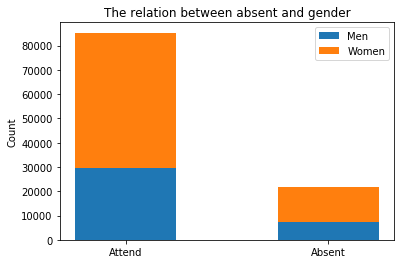

In [48]:
# Visualize the relation between gender and absent
N = 2 # Number of bar
# attend, absent
m = (len(attend_m), len(absent_m))
f = (len(attend_f), len(absent_f))

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, m, width)
p2 = plt.bar(ind, f, width, bottom=m)


plt.ylabel('Count')
plt.title('The relation between absent and gender')
plt.xticks(ind, ('Attend', 'Absent'))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.show()

_**The relation between absent and received sms**_


In [49]:
# Total number of patients who miss the appointment compare received SMS and those who didn't
absent.SMS_received.value_counts()

False    12112
True      9568
Name: SMS_received, dtype: int64

> ^More absent didn't received sms

In [50]:
# Separate weekdays for further analyze
absent_sms = absent[absent['SMS_received'] == True]
absent_nosms = absent[absent['SMS_received'] == False]

In [51]:
# Separate weekdays for further analyze
attend_sms = attend[attend['SMS_received'] == True]
attend_nosms = attend[attend['SMS_received'] == False]

In [52]:
# prop_absent_sms is proportion of absent who received sms
prop_absent_sms = len(absent_sms)/len(absent)
prop_absent_nosms = len(absent_nosms)/len(absent)

prop_absent_sms, prop_absent_nosms

(0.44132841328413286, 0.5586715867158671)

> ^The proportion of who miss the appointment and not recived sms is higher , but the difference is small can and _**can't figure out any conclusion.**_

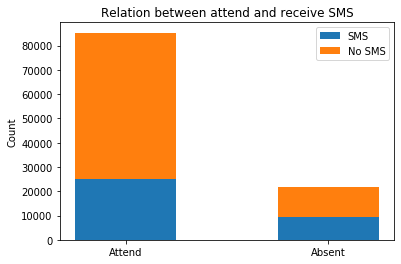

In [53]:
# Visualize the relation between attending and received SMS
N = 2 # Number of bar
# attend, absent
a = (len(attend_sms), len(absent_sms))
b = (len(attend_nosms), len(absent_nosms))

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, a, width)
p2 = plt.bar(ind, b, width, bottom=a)


plt.ylabel('Count')
plt.title('Relation between attend and receive SMS')
plt.xticks(ind, ('Attend', 'Absent'))
plt.legend((p1[0], p2[0]), ('SMS', 'No SMS'))
plt.show()

_**The relation between attending and appointment weekday**_


In [54]:
# Total absence distributed on weekdays
absent.Appointment_week_day.value_counts()

Tuesday      5024
Wednesday    4948
Monday       4515
Friday       3940
Thursday     3244
Saturday        9
Name: Appointment_week_day, dtype: int64

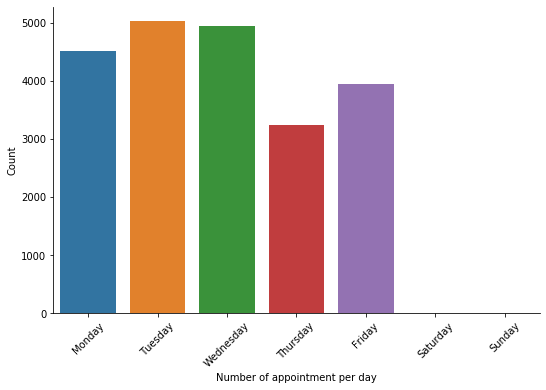

In [55]:
# To Visualize the table
sns.catplot(x='Appointment_week_day', data = absent, kind='count', order = Weekdays, aspect=1.5)
plt.xticks(rotation=45)
plt.xlabel("Number of appointment per day")
plt.ylabel("Count")
plt.show()

> ^The absent of appointment has no correlation, that conclude to _**the week day doesn't indicate who won't attend**_

In [56]:
# Separate weekdays for further analyzing

attend_mon = attend[attend['Appointment_week_day'] == 'Monday']
attend_tue = attend[attend['Appointment_week_day'] == 'Tuesday']
attend_wed = attend[attend['Appointment_week_day'] == 'Wednesday']
attend_thu = attend[attend['Appointment_week_day'] == 'Thursday']
attend_fri = attend[attend['Appointment_week_day'] == 'Friday']
attend_sat = attend[attend['Appointment_week_day'] == 'Saturday']
attend_sun = attend[attend['Appointment_week_day'] == 'Sunday']

In [57]:
# Separate weekdays for further analyzing

absent_mon = absent[absent['Appointment_week_day'] == 'Monday']
absent_tue = absent[absent['Appointment_week_day'] == 'Tuesday']
absent_wed = absent[absent['Appointment_week_day'] == 'Wednesday']
absent_thu = absent[absent['Appointment_week_day'] == 'Thursday']
absent_fri = absent[absent['Appointment_week_day'] == 'Friday']
absent_sat = absent[absent['Appointment_week_day'] == 'Saturday']
absent_sun = absent[absent['Appointment_week_day'] == 'Sunday']

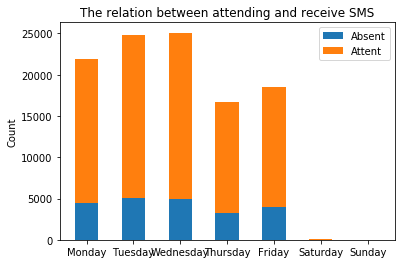

In [58]:
# Visualize the relation between attending and weekday
N = 7 # Number of bar
# attend, absent
a = (len(attend_mon), len(attend_tue),len(attend_wed), len(attend_thu),
     len(attend_fri),len(attend_sat),len(attend_sun))

b = ( len(absent_mon), len(absent_tue), len(absent_wed), len(absent_thu),
    len(absent_fri), len(absent_sat), len(absent_sun))


ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, b, width)
p2 = plt.bar(ind, a, width, bottom=b)


plt.ylabel('Count')
plt.title('The relation between attending and receive SMS')
plt.xticks(ind, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend((p1[0], p2[0]), ('Absent','Attent'))
plt.show()

_**The relation between attending and weekday**_


In [59]:
# To Separate young and old patient need threshold, the median is the middle number to sorted age and best to use here

#absent_young is number of young Patient who was absent
absent_young = absent[absent['Age'] < df_cleaned.Age.median()]
absent_old = absent[absent['Age'] >= df_cleaned.Age.median()]


# perc_no_f is proportion of female who was absent
prop_absent_young = len(absent_young)/len(absent)
prop_absent_old = len(absent_old)/len(absent)
prop_absent_young , prop_absent_old 

(0.5591328413284132, 0.4408671586715867)

> ^_**Younger patient has proportion to miss higher than older**_

In [60]:
#attend_young is the number of young Patients who was attending
attend_young = attend[attend['Age'] < df_cleaned.Age.median()]
attend_old = attend[attend['Age'] >= df_cleaned.Age.median()]

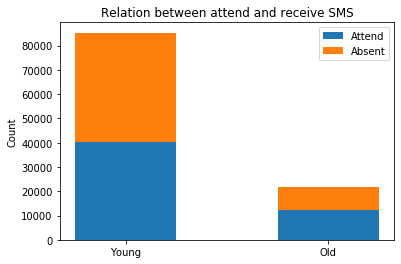

In [61]:
# Visualize the relation between attend and age
N = 2 # Number of bar
# attend, absent
a = (len(attend_young), len(absent_young))
b = (len(attend_old), len(absent_old))

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, a, width)
p2 = plt.bar(ind, b, width, bottom=a)


plt.ylabel('Count')
plt.title('Relation between attend and receive SMS')
plt.xticks(ind, ('Young', 'Old'))
plt.legend((p1[0], p2[0]), ('Attend', 'Absent'))
plt.show()

> it's very clear in the graph young miss more

# Answer questions

## Does the female more concerned to attend appointments than a male?
> The patient proportion when compare gender almost the same, which lead to _**the gender doesn't indicate who won't attend**_

## Does the older patient more concerned to attend appointments than the younger patient?
> _Yes older patients had been attending appointment more than younger patients._

## Does the appointment weekday influence attending the appointment?
> _**Very few** but generally most of the appointment in weekday, also the highest number of appointment was on Tuesday and Wednesday._

## Do those received SMS miss the appointment?
> The majority of the patient didn't receive SMS and still attend their appointment, on the other hand, _those who miss appointments some received SMS but a majority didn't receive SMS._

<a id='conclusions'></a>
# Conclusions

Analysis dataset of medical appointment containing 100K appointment with 14 variables (characteristics). 20% of patients have not attended their appointments. The purpose to get insights on the causes of missing appointments.

I would like to leave a notice to not expect any veracity of provided proclamations and statistical validity of the data however the insights obtained through this analysis can.

During the analysis of the dataset, we faced limitations such as;

- Can't confirm where the data comes from which hospital.
- Appointment day was defined in the description as the day when a patient call for an appointment but timestamp show all patients call at midnight which most probably leads to the column was modified, which prevents further analysis.
- Handicap columns were defined in the description as true/false value however in the dataset it represents disabilities.
- There are a few inconsistencies in a dataset like zero and negative age need verify.

### Gender
There is a major difference in the number of women attending than man, however, the proportion of women and men not attending was similar.

### Age
The ratio of not attending decreases for older patients. The highest rate for the child, while an older patient is at a lower rate. Most patient age is 38 years old.

### Receive SMS
The majority of patients miss there appoinment didn't receive SMS.

## References
- [Data Dictionary](https://www.kaggle.com/joniarroba/noshowappointments), Accessed in May 2020.
- [Matplotlib - pyplot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot), Accessed in May 2020.
- [Matplotlib - Stacked Bar Graph](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html), Accessed in May, 2020.
- [Github - Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet), Accessed in May 2020.
